In [532]:
import pandas as pd

# Cojo la bbdd con el topic modelling y las var obj sentiment
dataset = pd.read_csv("full-data.csv")

In [533]:
# Mostramos el dataset
dataset.head()

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3
0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,"Stockholm, Sweden",False,20504,98,[],2,No,test-shield-bot,False,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel
1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,"Namibia, Okaanga village",False,2733,970,[],1,No,Twitter Web App,False,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NaN
2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,"Leeds, England",False,353,943,[],1,footballdaily,Twitter for iPhone,False,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NaN
3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,NaN,False,6,1,[],3,Prashan32439454,Twitter for Android,False,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic
4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,NaN,False,5562,3,[],0,No,News Bot Algo,False,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NaN,NaN


In [534]:
# Mostramos el total de reviews que se consideran con valoración positiva 
dataset.sentiment.value_counts()

Neutro          3018
Negativo        2458
Positivo        1433
Muy Negativo     505
Muy Positivo     395
Name: sentiment, dtype: int64

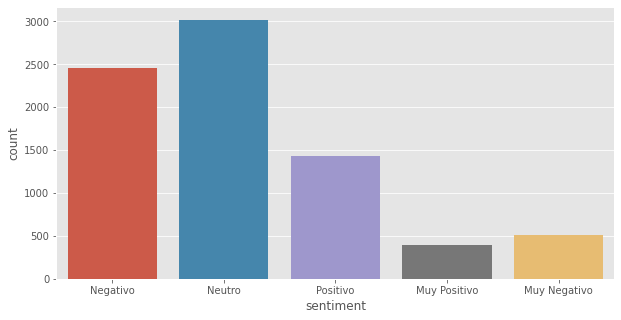

In [535]:
# De forma gráfica

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = dataset.sentiment, data = dataset)
plt.show()

In [536]:
import numpy as np

# Contamos el número de valores nulos o NA
np.sum(dataset.isnull())

Unnamed: 0                       0
text                             0
created_at                       0
created_at_time                  0
created_at_hour                  0
retweeted                        0
retweet_count                    0
favorite_count                   0
user_ verified                7809
user_id                          0
user_name                        0
user_location                 2686
user_notificacion                0
user_followers                   0
user_friends                     0
user_withheld_in_countries       0
mentions_in_tweet                0
is_reply                         0
source_device                    0
finished_tweet                   0
status_count                     0
hashtags_text                    0
hastags_indices                  0
hastags_in_tweet                 0
possitivity_textblob             0
possitivity_vader                0
possitivity_ibm                  0
sentiment_mean                   0
sentiment_norm      

In [537]:
# Cambio los nan de location por 'Vacio'
dataset['user_location'] = dataset['user_location'].replace(np.nan,'Vacio')
np.sum(dataset.isnull())

Unnamed: 0                       0
text                             0
created_at                       0
created_at_time                  0
created_at_hour                  0
retweeted                        0
retweet_count                    0
favorite_count                   0
user_ verified                7809
user_id                          0
user_name                        0
user_location                    0
user_notificacion                0
user_followers                   0
user_friends                     0
user_withheld_in_countries       0
mentions_in_tweet                0
is_reply                         0
source_device                    0
finished_tweet                   0
status_count                     0
hashtags_text                    0
hastags_indices                  0
hastags_in_tweet                 0
possitivity_textblob             0
possitivity_vader                0
possitivity_ibm                  0
sentiment_mean                   0
sentiment_norm      

In [538]:
# Contamos las veces que aparece cada location

locations = dataset.user_location.drop_duplicates()
freq = [0]*len(locations)

for location in dataset.user_location:

  ind = np.where(locations == str(location))
  indice = ind[0][0]

  freq[indice] = freq[indice] + 1


In [539]:
frecuencias = pd.DataFrame({'locations':locations, 'freq':freq})
frecuencias

,locations,freq
0,"Stockholm, Sweden",225
1,"Namibia, Okaanga village",1
2,"Leeds, England",3
3,Vacio,2686
7,"Bengaluru, India",9
...,...,...
7794,New York/Delaware,1
7797,Melbourne,1
7798,@liltunechi's heart,1
7799,crawley,1


In [540]:
lista = frecuencias['locations'].loc[frecuencias['freq']>4]

In [541]:
lista = list(lista)

In [542]:
# Creamos la categoría otros
condicion = dataset['user_location'].isin(lista)
dataset['user_location'] = dataset['user_location'].where(condicion,'Otros')

dataset['user_location'].value_counts()

Otros                     3102
Vacio                     2686
Stockholm, Sweden          225
London, England            121
United States               77
                          ... 
Liverpool, England           5
Dallas texas                 5
Lagos                        5
Indonesia                    5
West Midlands, England       5
Name: user_location, Length: 133, dtype: int64

### TOKENIZACIÓN Y LIMPIEZA DE TOKEN

In [543]:
# Importamos pandas y numpy 
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
tqdm.pandas()
import string
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
!{sys.executable} -m pip install contractions
import contractions  
# Instalamos nltk
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
# Instalamos spacy y su modelo pre-entrenado en inglés
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 12.0 MB 24.5 MB/s 
✔ Download and installation suc

In [544]:
def replace_contraction(text):
  expanded_words = []

  for t in text.split():
    expanded_words.append(contractions.fix(t))
  
  expanded_text =  ' '.join(expanded_words)
  return expanded_text

In [545]:
dataset['text_limpio'] = dataset['text'].apply(lambda x: replace_contraction(x))

In [546]:
dataset['text_limpio']

0       @Uber_Support hi guys why all my trips this we...
1       So are we getting Uber eats league 1 or not @S...
2       @footballdaily 2-3 years of Messi, a bit of ca...
3       @Prashan32439454 @Uber_Support @rameshjoshi80 ...
4       Uber's Gopuff partnership, Drizly deal being p...
                              ...                        
7804    Over 3,800 rides in over 3.5 years one blown t...
7805    @CoolABADev obviously i will want Messi to suc...
7806    @catekitchen Shit, that is absolutely a crap s...
7807    Simply do not take a Uber then dumb ass https:...
7808    Uber, Lyft prices keep climbing to new highs, ...
Name: text_limpio, Length: 7809, dtype: object

In [547]:
def tokenization(text):
  tokens = word_tokenize(text)
  return tokens

dataset['text_limpio'] = dataset['text_limpio'].progress_apply(lambda x: tokenization(x))

  0%|          | 0/7809 [00:00<?, ?it/s]

In [548]:
dataset['text_limpio']

0       [@, Uber_Support, hi, guys, why, all, my, trip...
1       [So, are, we, getting, Uber, eats, league, 1, ...
2       [@, footballdaily, 2-3, years, of, Messi, ,, a...
3       [@, Prashan32439454, @, Uber_Support, @, rames...
4       [Uber, 's, Gopuff, partnership, ,, Drizly, dea...
                              ...                        
7804    [Over, 3,800, rides, in, over, 3.5, years, one...
7805    [@, CoolABADev, obviously, i, will, want, Mess...
7806    [@, catekitchen, Shit, ,, that, is, absolutely...
7807    [Simply, do, not, take, a, Uber, then, dumb, a...
7808    [Uber, ,, Lyft, prices, keep, climbing, to, ne...
Name: text_limpio, Length: 7809, dtype: object

In [549]:
def quitar_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  filtered_sentence = [w for w in tokens if not w in stop_words]
  return filtered_sentence

dataset['text_limpio'] = dataset['text_limpio'].progress_apply(lambda x: quitar_stopwords(x))
dataset['text_limpio']

  0%|          | 0/7809 [00:00<?, ?it/s]

0       [@, Uber_Support, hi, guys, trips, week, added...
1       [So, getting, Uber, eats, league, 1, @, SuperS...
2       [@, footballdaily, 2-3, years, Messi, ,, bit, ...
3       [@, Prashan32439454, @, Uber_Support, @, rames...
4       [Uber, 's, Gopuff, partnership, ,, Drizly, dea...
                              ...                        
7804    [Over, 3,800, rides, 3.5, years, one, blown, t...
7805    [@, CoolABADev, obviously, want, Messi, succee...
7806    [@, catekitchen, Shit, ,, absolutely, crap, si...
7807    [Simply, take, Uber, dumb, ass, https, :, //t....
7808    [Uber, ,, Lyft, prices, keep, climbing, new, h...
Name: text_limpio, Length: 7809, dtype: object

In [550]:
def quitar_puntuacion(tokens):
  words = [word for word in tokens if word.isalnum()]
  return words

dataset['text_limpio'] = dataset['text_limpio'].progress_apply(lambda x: quitar_puntuacion(x))
dataset['text_limpio']

  0%|          | 0/7809 [00:00<?, ?it/s]

0          [hi, guys, trips, week, added, towards, quest]
1       [So, getting, Uber, eats, league, 1, SuperSpor...
2       [footballdaily, years, Messi, bit, casual, int...
3            [Prashan32439454, rameshjoshi80, Very, True]
4       [Uber, Gopuff, partnership, Drizly, deal, prob...
                              ...                        
7804    [Over, rides, years, one, blown, transmission,...
7805    [CoolABADev, obviously, want, Messi, succeed, ...
7806    [catekitchen, Shit, absolutely, crap, situatio...
7807               [Simply, take, Uber, dumb, ass, https]
7808    [Uber, Lyft, prices, keep, climbing, new, high...
Name: text_limpio, Length: 7809, dtype: object

In [551]:
nlp = en_core_web_sm.load()

def lematizar(tokens):
  sentence = ' '.join(tokens)
  mytokens = nlp(sentence)
  mytokens = [word.lemma_ if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens]
  return ' '.join(mytokens)

dataset['text_limpio'] = dataset['text_limpio'].progress_apply(lambda x: lematizar(x))
dataset['text_limpio']

  0%|          | 0/7809 [00:00<?, ?it/s]

0                      hi guy trip week add towards quest
1                   so get Uber eat league 1 supersporttv
2       footballdaily year Messi bit casual interest U...
3                 Prashan32439454 rameshjoshi80 very true
4       Uber Gopuff partnership Drizly deal probe FTC ...
                              ...                        
7804    over ride year one blow transmission 2 car lat...
7805    CoolABADev obviously want Messi succeed win sh...
7806    catekitchen Shit absolutely crap situation i u...
7807                      simply take Uber dumb ass https
7808    Uber Lyft price keep climb new high report fin...
Name: text_limpio, Length: 7809, dtype: object

### Importancia de los token

Con las sentencias anteriores hemos obtenido una manera de tokenizar de forma lematizada y obviando las palabras que no aportan significado a las opiniones, cualquiera de los textos que forman parte del corpues bajo estudio.

El ejercicio pide tokenizar con la librería NLTK, por lo que haremos ahora una función que realice esta acción, a pesar de haber obtenido una función muy completa con la librería spacy. A esta función anterior se le podrían aplicar todas las condiciones que queramos.

Observamos que con la función creada, limpiar, el verbo 'got' ha sido eliminado por falta de significado, aunque ambas tokenizaciones se realicen de igual manera. 

A partir de estas tokenizaciones, en particular, de la primera (pos ser una bbdd limpia) podemos obtener el vocabulario del corpus o lo que es lo mismo, el conjunto de palabras que aparecen en las opiniones y el número de veces que aparece cada una. En este caso elegimos la función TfidVectoricer porque no solo tiene en cuenta la frecuencia con la que aparece cada token sino el número de opiniones en las que aparece.

In [552]:
# Importamos la librería que vamos a utilizar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [553]:
# Creamos el vectorizador con el tokenizador creado anteriormente (limpiar)
tfidf_vectorizer = TfidfVectorizer(norm=None,smooth_idf=False,tokenizer=word_tokenize) 

# Hacemos fit con nuestro corpus
tweets_fit = tfidf_vectorizer.fit(dataset['text_limpio'])

In [554]:
# Obtenemos el diccionario que mapea la posición en el vector del vocabulario
diccionario = tweets_fit.vocabulary_
list(diccionario.items())[0:10]

[('hi', 6684),
 ('guy', 6400),
 ('trip', 14897),
 ('week', 15865),
 ('add', 595),
 ('towards', 14782),
 ('quest', 11644),
 ('so', 13383),
 ('get', 6007),
 ('uber', 15051)]

Una vez que tenemos las reviews en el formato deseado, creamos dos columnas para contar el número de token y el número de carácteres en cada documento, de forma que posteriormente podamos representar las distribuciones de una forma más sencilla.

In [555]:
# Creamos una columna con el número de carácteres que tiene cada opinión
dataset['caracteres'] = dataset['text_limpio'].apply(lambda x: len(x))

In [556]:
# Comprobamos que la columna se ha creado correctamente
dataset.head()

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3,text_limpio,caracteres
0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,"Stockholm, Sweden",False,20504,98,[],2,No,test-shield-bot,False,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel,hi guy trip week add towards quest,34
1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,Otros,False,2733,970,[],1,No,Twitter Web App,False,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NaN,so get Uber eat league 1 supersporttv,37
2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,Otros,False,353,943,[],1,footballdaily,Twitter for iPhone,False,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NaN,footballdaily year Messi bit casual interest U...,83
3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,Vacio,False,6,1,[],3,Prashan32439454,Twitter for Android,False,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic,Prashan32439454 rameshjoshi80 very true,39
4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,Vacio,False,5562,3,[],0,No,News Bot Algo,False,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NaN,NaN,Uber Gopuff partnership Drizly deal probe FTC ...,69


In [557]:
# Creamos una columna con el número de tokens que tiene cada opinión
dataset['tokens'] = dataset['text_limpio'].apply(lambda x: len(word_tokenize(x)))

In [558]:
# Comprobamos que la columna se ha creado correctamente
dataset.head()

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3,text_limpio,caracteres,tokens
0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,"Stockholm, Sweden",False,20504,98,[],2,No,test-shield-bot,False,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel,hi guy trip week add towards quest,34,7
1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,Otros,False,2733,970,[],1,No,Twitter Web App,False,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NaN,so get Uber eat league 1 supersporttv,37,7
2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,Otros,False,353,943,[],1,footballdaily,Twitter for iPhone,False,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NaN,footballdaily year Messi bit casual interest U...,83,12
3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,Vacio,False,6,1,[],3,Prashan32439454,Twitter for Android,False,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic,Prashan32439454 rameshjoshi80 very true,39,4
4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,Vacio,False,5562,3,[],0,No,News Bot Algo,False,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NaN,NaN,Uber Gopuff partnership Drizly deal probe FTC ...,69,10


Una vez que hemos preparado nuestro dataset, podemos proceder a la representación gráfica de las distribuciones de ambas clases en base primero al número de carácteres y en segundo lugar al número de tokens por documento.

In [559]:
import seaborn as sns
import matplotlib.pyplot as plt

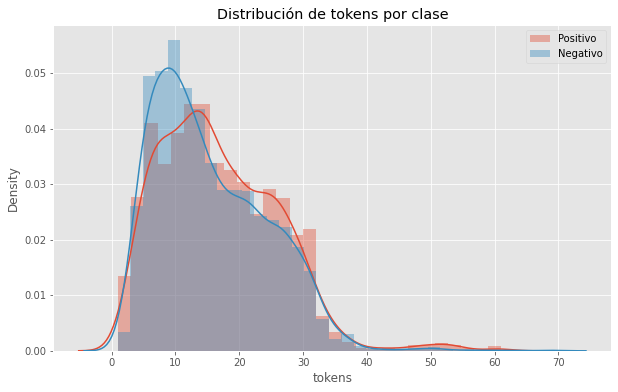

In [560]:
# Distribución del número de carácteres
fig = plt.figure(figsize=(10,6))

plt1 = sns.distplot(dataset.tokens.loc[dataset['sentiment'].isin(['Positivo', 'Muy Positivo'])], hist=True, label = 'Positivo')
plt2 = sns.distplot(dataset.tokens.loc[dataset['sentiment'].isin(['Negativo', 'Muy Negativo'])], hist=True, label = 'Negativo')

plt.title('Distribución de tokens por clase')
plt.legend()
plt.show()

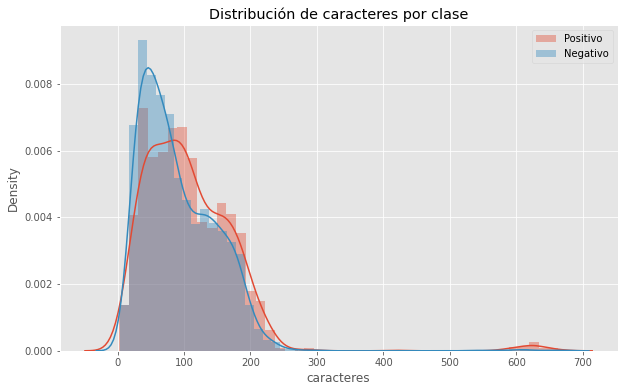

In [561]:
# Distribución del número de carácteres
fig = plt.figure(figsize=(10,6))

plt1 = sns.distplot(dataset.caracteres.loc[dataset['sentiment'].isin(['Positivo', 'Muy Positivo'])], hist=True, label = 'Positivo')
plt2 = sns.distplot(dataset.caracteres.loc[dataset['sentiment'].isin(['Negativo', 'Muy Negativo'])], hist=True, label = 'Negativo')

plt.title('Distribución de caracteres por clase')
plt.legend()
plt.show()

De los gráficos anteriores podríamos observar una ligera diferencia en cuanto a la longitud de los tweets en base a la clasificación de las mismas, teniendo mayor número de carácteres y/o tokens aquellas que son POSITIVAS. Podemos comprobar esto analíticamente y ver si realmente se cumple, porque la diferencia es bastante ligera entre ambas distribuciones.

In [562]:
# Número medio de tokens en las opiniones positivas
positivas = dataset.loc[dataset['sentiment'].isin(['Positivo', 'Muy Positivo'])]

token_media_pos = sum(positivas['tokens'])/len(positivas['tokens'])
token_media_pos

16.835339168490155

In [563]:
# Número medio de tokens en las opiniones negativas
negativas = dataset.loc[dataset['sentiment'].isin(['Negativo', 'Muy Negativo'])]

token_media_neg = sum(negativas['tokens'])/len(negativas['tokens'])
token_media_neg

15.487343908201147

Observamos también analíticamente que las opiniones positivas son más largas en media que las opiniones negativas.

En este apartado se pide representar un histograma con los 30 token más utilizados o que más se repiten en las opiniones, una vez se ha aplicado el proceso de limpieza. 

A continuación creamos una función que cuenta el número de veces que se repite cada token. Para ello creamos un diccionario como hicimos en uno de los apartados anteriores, pero esta vez partimos de las reviews que hemos 'limpiado'.

In [564]:
# Creamos el vectorizador de nuevo. Tokenizador nltk.
tfidf_vectorizer2 = TfidfVectorizer(norm=None,smooth_idf=False, tokenizer=word_tokenize) 

# Hacemos fit con las opiniones limpias
tweet_fit = tfidf_vectorizer2.fit(dataset['text_limpio'])

# Obtenemos el diccionario que mapea la posición en el vector del vocabulario
diccionario2 = tweet_fit.vocabulary_

# Creamos una lista con 
vocabulario = list(diccionario2.keys())

In [565]:
# Comprobamos que se ha creado correctamente
vocabulario[0:10]

['hi', 'guy', 'trip', 'week', 'add', 'towards', 'quest', 'so', 'get', 'uber']

In [566]:
# Creamos una función para obtener las frecuencias de los token

def freq(lista):
    frecuencia = {} 
    for item in lista:
        if (item in frecuencia):
            frecuencia[item] = frecuencia[item] + 1
        else:
            frecuencia[item] = 1
    return frecuencia

In [567]:
# Extraermos los tokens de todos los textos y los introducimos en una lista común

tokens_total = []

for tweet in dataset['text_limpio']:
  tokens_review = word_tokenize(tweet)
  # Añadimos esos tokens como nuevos elementos
  tokens_total.extend(tokens_review)

In [568]:
# Comprobamos que se ha creado correctamente la lista
tokens_total[0:9]

['hi', 'guy', 'trip', 'week', 'add', 'towards', 'quest', 'so', 'get']

In [569]:
# Aplicamos la función que crea un diccionario con las frecuencias
freq_token = freq(tokens_total)

# Comprobamos que se ha creado correctamente
freq_token['trip']

166

In [570]:
# Ordenamos el diccionario en base a la frecuencia de cada token
freq_ord = sorted(freq_token.items(), key=lambda x: x[1], reverse=True)

In [571]:
# Convertimos el objeto anterior en dos listas, de cara a la representación
token_nombre = []
token_freq = []
for token in freq_ord:
    token_nombre.append(token[0])
    token_freq.append(token[1])

In [572]:
# Comprobamos que las listas se han creado correctamente
print(token_nombre[0:9],'\n',token_freq[0:9])

['Uber', 'i', 'https', 'uber', 'driver', 'get', 'like', 'eat', 'go'] 
 [4918, 3856, 1857, 1780, 1423, 1341, 865, 802, 731]


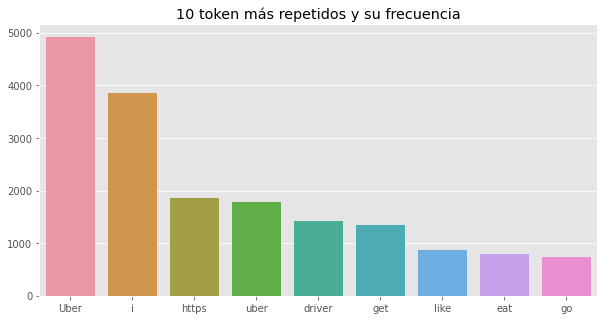

In [573]:
# Representamos los 10 mayores con la libreriia seaborn
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_nombre[0:9], y=token_freq[0:9])
plt.title('10 token más repetidos y su frecuencia')
plt.xticks(rotation=0)
plt.show()

In [574]:
print(token_nombre)

['Uber', 'i', 'https', 'uber', 'driver', 'get', 'like', 'eat', 'go', 'take', 'please', 'us', 'the', 'use', 'make', 'order', 'time', 'would', 'account', 'help', 'say', 'http', 'one', 'want', 'amp', 'ride', 'car', 'pay', 'know', 'send', 'we', 'number', 'DM', 'think', 'work', 'need', 'look', 'phone', 'call', 'assist', 'back', 'even', 'well', 'see', 'drive', 'taxi', 'people', 'day', 'this', 'app', 'money', 'way', 'Lyft', 'tell', 'my', 'home', 'good', 'you', 'service', 'charge', 'try', 'price', 'come', 'support', 'Eats', 'still', 'ask', 'if', 'thank', 'wait', 'give', 'and', 'year', 'never', 'company', 'let', 'UBER', 'via', 'could', 'really', 'food', '2', 'email', 'also', 'associate', 'be', 'new', 'much', 'thing', 'do', 'trip', 'keep', 'right', 'last', 'start', 'customer', 'guy', 'it', 'delivery', 'no', 'check', 'first', 'shit', 'hi', 'but', 'issue', 'they', 'cancel', 'cab', 'in', '1', 'week', 'bad', 'night', 'every', 'someone', 'hour', 'reach', 'end', 'always', 'leave', 'minute', 'so', 'tod

### Variable objetivo Afinn

Escala de -5 a 5 en positividad para cada token

In [575]:
!pip install afinn

In [576]:
from afinn import Afinn

In [577]:
afinn = Afinn(language='en')

In [578]:
score = []

for palabra in token_nombre:
  punt = afinn.score(palabra)
  score.append(punt)

In [579]:
print(token_nombre[0:9])
print(score[0:9])

['Uber', 'i', 'https', 'uber', 'driver', 'get', 'like', 'eat', 'go']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]


In [580]:
def sentimiento_tweet(text, palabras, scores):

  sents = []
  tokens = word_tokenize(text)

  for token in tokens:
    ind = palabras.index(token)
    sents.append(scores[ind])
  
  return sents

In [581]:
np.mean(sentimiento_tweet(dataset['text_limpio'][5],token_nombre,score))

0.05263157894736842

In [582]:
max(score)

5.0

In [583]:
min(score)

-5.0

In [584]:
dataset['sent_nuevo_media'] = dataset['text_limpio'].progress_apply(lambda x: np.mean(sentimiento_tweet(x,token_nombre,score)))

  0%|          | 0/7809 [00:00<?, ?it/s]

In [585]:
dataset['sent_nuevo_suma'] = dataset['text_limpio'].progress_apply(lambda x: sum(sentimiento_tweet(x,token_nombre,score)))

  0%|          | 0/7809 [00:00<?, ?it/s]

In [586]:
dataset.head()

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3,text_limpio,caracteres,tokens,sent_nuevo_media,sent_nuevo_suma
0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,"Stockholm, Sweden",False,20504,98,[],2,No,test-shield-bot,False,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel,hi guy trip week add towards quest,34,7,0.000000,0.0
1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,Otros,False,2733,970,[],1,No,Twitter Web App,False,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NaN,so get Uber eat league 1 supersporttv,37,7,0.000000,0.0
2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,Otros,False,353,943,[],1,footballdaily,Twitter for iPhone,False,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NaN,footballdaily year Messi bit casual interest U...,83,12,0.083333,1.0
3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,Vacio,False,6,1,[],3,Prashan32439454,Twitter for Android,False,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic,Prashan32439454 rameshjoshi80 very true,39,4,0.500000,2.0
4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,Vacio,False,5562,3,[],0,No,News Bot Algo,False,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NaN,NaN,Uber Gopuff partnership Drizly deal probe FTC ...,69,10,0.000000,0.0


In [587]:
np.sum(dataset.isnull())

Unnamed: 0                       0
text                             0
created_at                       0
created_at_time                  0
created_at_hour                  0
retweeted                        0
retweet_count                    0
favorite_count                   0
user_ verified                7809
user_id                          0
user_name                        0
user_location                    0
user_notificacion                0
user_followers                   0
user_friends                     0
user_withheld_in_countries       0
mentions_in_tweet                0
is_reply                         0
source_device                    0
finished_tweet                   0
status_count                     0
hashtags_text                    0
hastags_indices                  0
hastags_in_tweet                 0
possitivity_textblob             0
possitivity_vader                0
possitivity_ibm                  0
sentiment_mean                   0
sentiment_norm      

In [588]:
dataset.loc[dataset['sent_nuevo_media'].isnull()]

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3,text_limpio,caracteres,tokens,sent_nuevo_media,sent_nuevo_suma
494,494,@Uber_Kryptonian *Waller,Wed Aug 11,08:23:39,8,No,0,1,NaN,451707362,NicholasMoore16,Vacio,False,333,502,[],1,NicholasMoore16,Twitter for iPhone,False,73334,[],[],0,0.0,0.0,0.0,0.0,0.5,Neutro,"[{'score': 0.592882, 'label': '/art and entert...",art and entertainment,comics and animation,comics,,0,0,NaN,0.0
2864,2864,@Uber_Anne *scritches your nipnips*,Mon Aug 09,22:12:30,22,No,0,0,NaN,1167549210734080000,Demodeview,Vacio,False,142,210,[],1,Uber_Anne,Twitter Web App,False,37029,[],[],0,0.0,0.0,0.0,0.0,0.5,Neutro,[],N,o,t,,0,0,NaN,0.0


In [589]:
# Creo una variable que cuenta el número de palabras positivas
# Una variable que cuenta el número de palabras neutras
# una variable que cuenta el número de palabras negativas

# Rango (-5, -1, 0, 1, 5)

dataset['num_pos'] = dataset['text_limpio'].progress_apply(lambda x: sum(e > 1 for e in sentimiento_tweet(x,token_nombre,score)))
dataset['num_neg'] = dataset['text_limpio'].progress_apply(lambda x: sum(e < -1 for e in sentimiento_tweet(x,token_nombre,score)))
dataset['num_neutro'] = dataset['text_limpio'].progress_apply(lambda x: sum((e >= -1) and (e <= 1) for e in sentimiento_tweet(x,token_nombre,score)))

dataset.head()

  0%|          | 0/7809 [00:00<?, ?it/s]

  0%|          | 0/7809 [00:00<?, ?it/s]

  0%|          | 0/7809 [00:00<?, ?it/s]

,Unnamed: 0,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3,text_limpio,caracteres,tokens,sent_nuevo_media,sent_nuevo_suma,num_pos,num_neg,num_neutro
0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,"Stockholm, Sweden",False,20504,98,[],2,No,test-shield-bot,False,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel,hi guy trip week add towards quest,34,7,0.000000,0.0,0,0,7
1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,Otros,False,2733,970,[],1,No,Twitter Web App,False,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NaN,so get Uber eat league 1 supersporttv,37,7,0.000000,0.0,0,0,7
2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,Otros,False,353,943,[],1,footballdaily,Twitter for iPhone,False,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NaN,footballdaily year Messi bit casual interest U...,83,12,0.083333,1.0,0,0,12
3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,Vacio,False,6,1,[],3,Prashan32439454,Twitter for Android,False,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic,Prashan32439454 rameshjoshi80 very true,39,4,0.500000,2.0,1,0,3
4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,Vacio,False,5562,3,[],0,No,News Bot Algo,False,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NaN,NaN,Uber Gopuff partnership Drizly deal probe FTC ...,69,10,0.000000,0.0,0,0,10


In [590]:
dataset['num_pos'].value_counts()

0    4565
1    2119
2     723
3     258
4     109
5      17
6      12
7       6
Name: num_pos, dtype: int64

In [591]:
dataset['num_neg'].value_counts()

0    5281
1    1707
2     556
3     169
4      66
5      23
6       7
Name: num_neg, dtype: int64

### Cluster

In [592]:
# Limpiamos el fichero y cogemos solo las variables que utilizaremos para el cluster
dataset.keys()

Index(['Unnamed: 0', 'text', 'created_at', 'created_at_time',
       'created_at_hour', 'retweeted', 'retweet_count', 'favorite_count',
       'user_ verified', 'user_id', 'user_name', 'user_location',
       'user_notificacion', 'user_followers', 'user_friends',
       'user_withheld_in_countries', 'mentions_in_tweet', 'is_reply',
       'source_device', 'finished_tweet', 'status_count', 'hashtags_text',
       'hastags_indices', 'hastags_in_tweet', 'possitivity_textblob',
       'possitivity_vader', 'possitivity_ibm', 'sentiment_mean',
       'sentiment_norm', 'sentiment', 'categories', 'topic_1', 'topic_2',
       'topic_3', 'text_limpio', 'caracteres', 'tokens', 'sent_nuevo_media',
       'sent_nuevo_suma', 'num_pos', 'num_neg', 'num_neutro'],
      dtype='object')

In [593]:
df = dataset.drop(['Unnamed: 0','text', 'created_at_time','user_ verified',
                   'user_name','user_withheld_in_countries', 'hashtags_text',
                   'hastags_indices', 'possitivity_textblob',
                   'possitivity_vader', 'possitivity_ibm', 'sentiment_mean',
                   'sentiment_norm', 'sentiment', 'categories', 'topic_2',
                   'topic_3', 'text_limpio', 'sent_nuevo_media',
                   'sent_nuevo_suma','num_neutro'],
                  axis=1)

In [594]:
df.shape

(7809, 21)

In [595]:
df.head()

,created_at,created_at_hour,retweeted,retweet_count,favorite_count,user_id,user_location,user_notificacion,user_followers,user_friends,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hastags_in_tweet,topic_1,caracteres,tokens,num_pos,num_neg
0,Wed Aug 11,9,Si,1,0,1137383922843771008,"Stockholm, Sweden",False,20504,98,2,No,test-shield-bot,False,695888,0,travel,34,7,0,0
1,Wed Aug 11,9,No,0,0,528288653,Otros,False,2733,970,1,No,Twitter Web App,False,58398,0,sports,37,7,0,0
2,Wed Aug 11,9,No,0,0,826917817,Otros,False,353,943,1,footballdaily,Twitter for iPhone,False,5974,0,sports,83,12,0,0
3,Wed Aug 11,9,No,0,0,1382729072837479936,Vacio,False,6,1,3,Prashan32439454,Twitter for Android,False,169,0,science,39,4,1,0
4,Wed Aug 11,9,No,0,0,3646985662,Vacio,False,5562,3,0,No,News Bot Algo,False,113083,0,news,69,10,0,0


In [596]:
# Aplico algunos cambios a las variables categóricas para hacerlas más simples
# de cara al modelado
df.dtypes

created_at           object
created_at_hour       int64
retweeted            object
retweet_count         int64
favorite_count        int64
user_id               int64
user_location        object
user_notificacion      bool
user_followers        int64
user_friends          int64
mentions_in_tweet     int64
is_reply             object
source_device        object
finished_tweet         bool
status_count          int64
hastags_in_tweet      int64
topic_1              object
caracteres            int64
tokens                int64
num_pos               int64
num_neg               int64
dtype: object

In [597]:
# Elimino retweeted y las dos booleanas por no aportar informacion adicional
# Elimino user id por ser un ID
df = df.drop(['retweeted', 'user_id',
              'user_notificacion','finished_tweet'],axis = 1)

In [598]:
df.head()

,created_at,created_at_hour,retweet_count,favorite_count,user_location,user_followers,user_friends,mentions_in_tweet,is_reply,source_device,status_count,hastags_in_tweet,topic_1,caracteres,tokens,num_pos,num_neg
0,Wed Aug 11,9,1,0,"Stockholm, Sweden",20504,98,2,No,test-shield-bot,695888,0,travel,34,7,0,0
1,Wed Aug 11,9,0,0,Otros,2733,970,1,No,Twitter Web App,58398,0,sports,37,7,0,0
2,Wed Aug 11,9,0,0,Otros,353,943,1,footballdaily,Twitter for iPhone,5974,0,sports,83,12,0,0
3,Wed Aug 11,9,0,0,Vacio,6,1,3,Prashan32439454,Twitter for Android,169,0,science,39,4,1,0
4,Wed Aug 11,9,0,0,Vacio,5562,3,0,No,News Bot Algo,113083,0,news,69,10,0,0


In [599]:
df.dtypes

created_at           object
created_at_hour       int64
retweet_count         int64
favorite_count        int64
user_location        object
user_followers        int64
user_friends          int64
mentions_in_tweet     int64
is_reply             object
source_device        object
status_count          int64
hastags_in_tweet      int64
topic_1              object
caracteres            int64
tokens                int64
num_pos               int64
num_neg               int64
dtype: object

In [600]:
# Modifico source_device y is_reply de forma simple

cond1 = df['is_reply'].isin(['No','Uber_Support','Uber'])
df['is_reply'] = df['is_reply'].where(cond1,'Si')
cond2 = df['is_reply'].isin(['Si','No','Uber'])
df['is_reply'] = df['is_reply'].where(cond2,'Uber')

cond3 = df['source_device'].isin(['Twitter for iPhone','Twitter for Android',
                                         'Twitter Web App','Sprinklr'])
df['source_device'] = df['source_device'].where(cond3,'Otro')

In [601]:
df.is_reply.value_counts()

No      4181
Si      3290
Uber     338
Name: is_reply, dtype: int64

In [602]:
df.source_device.value_counts()

Twitter for iPhone     3408
Twitter for Android    1843
Twitter Web App        1254
Otro                    781
Sprinklr                523
Name: source_device, dtype: int64

In [603]:
df.keys()

Index(['created_at', 'created_at_hour', 'retweet_count', 'favorite_count',
       'user_location', 'user_followers', 'user_friends', 'mentions_in_tweet',
       'is_reply', 'source_device', 'status_count', 'hastags_in_tweet',
       'topic_1', 'caracteres', 'tokens', 'num_pos', 'num_neg'],
      dtype='object')

In [604]:
# Seleccionamos las variables categoricas

categories = df.select_dtypes(['object']).keys()
categories

Index(['created_at', 'user_location', 'is_reply', 'source_device', 'topic_1'], dtype='object')

In [620]:
cat = df['created_at'].drop_duplicates()
cat = list(cat)

df['created_at'] = df['created_at'].apply(lambda x: x.replace(x, str(cat.index(x))))

In [625]:
cat = df['user_location'].drop_duplicates()
cat = list(cat)

df['user_location'] = df['user_location'].apply(lambda x: x.replace(x, str(cat.index(x))))

In [626]:
cat = df['is_reply'].drop_duplicates()
cat = list(cat)

df['is_reply'] = df['is_reply'].apply(lambda x: x.replace(x, str(cat.index(x))))

In [627]:
cat = df['source_device'].drop_duplicates()
cat = list(cat)

df['source_device'] = df['source_device'].apply(lambda x: x.replace(x, str(cat.index(x))))

In [628]:
cat = df['topic_1'].drop_duplicates()
cat = list(cat)

df['topic_1'] = df['topic_1'].apply(lambda x: x.replace(x, str(cat.index(x))))

In [631]:
df[categories] = df[categories].astype('int')

In [632]:
df.dtypes

created_at           int64
created_at_hour      int64
retweet_count        int64
favorite_count       int64
user_location        int64
user_followers       int64
user_friends         int64
mentions_in_tweet    int64
is_reply             int64
source_device        int64
status_count         int64
hastags_in_tweet     int64
topic_1              int64
caracteres           int64
tokens               int64
num_pos              int64
num_neg              int64
dtype: object

In [633]:
# KMeans está en el paquete sklearn.cluster
from sklearn.cluster import KMeans

In [634]:
df.shape

(7809, 17)

In [635]:
# Elimino los na para que funcione el cluster
df = df.dropna()

In [636]:
df.shape

(7809, 17)

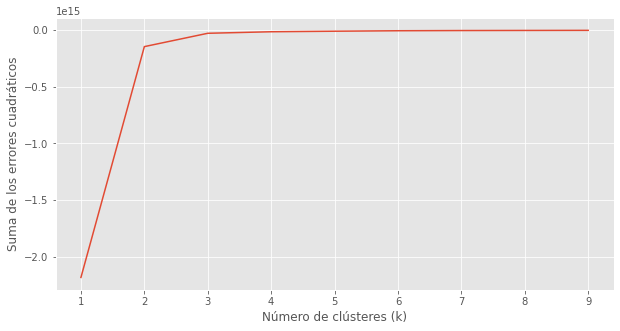

In [637]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 10) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [638]:
#%% Aplicación de k-means con k = 3.
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.47202296e-01  1.51284075e+01  6.34043042e+01  1.75236729e+00
   1.36840746e+01  2.20776542e+03  1.03752009e+03  1.18895265e+00
   4.94117647e-01  1.94131994e+00  2.80426218e+04  2.32568149e-01
   7.76671449e+00  9.11144907e+01  1.49849354e+01  5.95408895e-01
   5.02725968e-01]
 [ 8.10000000e-01  1.55540000e+01  4.60000000e-02  7.40000000e-02
   1.99400000e+00  6.28829930e+05  4.33214600e+03  1.00200000e+00
   9.94000000e-01  3.98000000e+00  2.04303151e+06 -4.71844785e-16
   7.77800000e+00  1.00498000e+02  1.56300000e+01  1.17200000e+00
   8.00000000e-02]
 [ 6.31268437e-01  1.36637168e+01  3.11209440e+00  7.96460177e-02
   5.09734513e+00  2.32583186e+04  4.56263717e+03  2.25958702e+00
   7.37463127e-02  5.01474926e-01  6.43105003e+05  1.32743363e-01
   7.50737463e+00  1.26604720e+02  1.94100295e+01  7.02064897e-01
   5.98820059e-01]]


In [639]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df)
df['label'] = labels

In [640]:
df.head()

,created_at,created_at_hour,retweet_count,favorite_count,user_location,user_followers,user_friends,mentions_in_tweet,is_reply,source_device,status_count,hastags_in_tweet,topic_1,caracteres,tokens,num_pos,num_neg,label
0,0,9,1,0,0,20504,98,2,0,0,695888,0,0,34,7,0,0,2
1,0,9,0,0,1,2733,970,1,0,1,58398,0,1,37,7,0,0,0
2,0,9,0,0,1,353,943,1,1,2,5974,0,1,83,12,0,0,0
3,0,9,0,0,2,6,1,3,1,3,169,0,2,39,4,1,0,0
4,0,9,0,0,2,5562,3,0,0,0,113083,0,3,69,10,0,0,0


In [646]:
df['label'].value_counts()

0    6970
1     500
2     339
Name: label, dtype: int64

In [650]:
# Añado la vo para comparar los resultados
df['vo'] = dataset['sent_nuevo_media']

In [651]:
df['sentiment'] = dataset['sentiment']

In [675]:
df[['tokens','num_pos','num_neg']].loc[df['label']==0].apply(lambda x: sum(x)*100/sum(df['tokens']),axis=0)

tokens     87.887075
num_pos     3.492090
num_neg     2.948502
dtype: float64

In [676]:
df[['tokens','num_pos','num_neg']].loc[df['label']==1].apply(lambda x: sum(x)*100/sum(df['tokens']),axis=0)

tokens     6.576069
num_pos    0.493100
num_neg    0.033659
dtype: float64

In [677]:
df[['tokens','num_pos','num_neg']].loc[df['label']==2].apply(lambda x: sum(x)*100/sum(df['tokens']),axis=0)

tokens     5.536856
num_pos    0.200269
num_neg    0.170818
dtype: float64

Con estos resultados, no sabría cómo etiquetar a cada cluster. 